## Interpolate input weather data to dt = 0.5 to match amr wind dt ##

In [32]:
# Most recently tested against PySAM 4.2.0

# NOTE: at this stage this notebook is not running and needs to be updated

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySAM.Pvwattsv7 as pvwatts

### Read sample data

In [40]:
### Initial data file code ###
# data = pd.read_csv("NonAnnualSimulation-sample_data.csv")
# data["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(data["Timestamp"], utc=True))
# data = data.set_index("Timestamp")
# data = data[data.index > "2018-05-10 12:30:00+0000"]  # select only after 10am UTC

### Flatirons data file code ###
data = pd.read_csv("Flatirons_solar_data-06-24-2024.csv", parse_dates=[["Timestamp","MST"]])
# data = pd.read_csv("Flatirons_solar_data-06-24-2024.csv")
print(data)

#####################################
# NEED TO FIGURE OUT DATA TIME ZONES
#####################################

data["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(data["Timestamp_MST"]))
data["Timestamp"].dt.tz_localize('MST', ambiguous='infer')
data["Timestamp"].dt.tz_convert('UTC')

data = data.set_index("Timestamp")
# data = data[data.index > "2024-06-24 12:30:00+0000"]  # select only after 10am UTC

           Timestamp_MST  Global Horizontal [W/m^2]  Direct Normal [W/m^2]  \
0    2024-06-24 00:00:00                   -2.26957              -1.063870   
1    2024-06-24 00:01:00                   -2.18896              -1.176750   
2    2024-06-24 00:02:00                   -2.11087              -1.227540   
3    2024-06-24 00:03:00                   -2.05545              -1.252940   
4    2024-06-24 00:04:00                   -2.03530              -1.179570   
...                  ...                        ...                    ...   
1435 2024-06-24 23:55:00                   -1.91692              -1.698810   
1436 2024-06-24 23:56:00                   -2.12095              -1.712920   
1437 2024-06-24 23:57:00                   -1.97738              -1.252940   
1438 2024-06-24 23:58:00                   -2.10332              -1.227550   
1439 2024-06-24 23:59:00                   -2.25195              -0.990507   

      Diffuse Horizontal [W/m^2]  Temperature @ 2m [deg C]  \
0

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

In [39]:
data = data.drop(["Timestamp_MST"], axis=1)
data.head()

,Global Horizontal [W/m^2],Direct Normal [W/m^2],Diffuse Horizontal [W/m^2],Temperature @ 2m [deg C],Avg Wind Speed @ 2m [m/s],Avg Wind Speed @ 10m [m/s],Peak Wind Speed @ 2m [m/s],Peak Wind Speed @ 10m [m/s]
Timestamp,,,,,,,,
2024-06-24 00:00:00,-2.26957,-1.06387,-3.04873,19.57,1.532,3.045,1.751,3.262
2024-06-24 00:01:00,-2.18896,-1.17675,-3.05651,19.16,1.959,2.906,2.285,3.031
2024-06-24 00:02:00,-2.11087,-1.22754,-3.00860,18.87,2.555,2.833,2.865,3.193
2024-06-24 00:03:00,-2.05545,-1.25294,-2.84670,18.77,2.557,2.611,2.795,2.729
2024-06-24 00:04:00,-2.03530,-1.17957,-2.69129,18.72,2.659,2.543,2.888,2.891


In [29]:
data.info()
# column_names = data.columns[1:]
# column_names_str = column_names.astype('str')
# col_names = [x for x in column_names_str]
# print(col_names)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 689 entries, 2024-06-24 12:31:00+00:00 to 2024-06-24 23:59:00+00:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Global Horizontal [W/m^2]    689 non-null    float64
 1   Direct Normal [W/m^2]        689 non-null    float64
 2   Diffuse Horizontal [W/m^2]   689 non-null    float64
 3   Temperature @ 2m [deg C]     689 non-null    float64
 4   Avg Wind Speed @ 2m [m/s]    689 non-null    float64
 5   Avg Wind Speed @ 10m [m/s]   689 non-null    float64
 6   Peak Wind Speed @ 2m [m/s]   689 non-null    float64
 7   Peak Wind Speed @ 10m [m/s]  689 non-null    float64
dtypes: float64(8)
memory usage: 48.4 KB


In [30]:
data_resampled = data.resample("0.5S").asfreq()

data_resampled_filled = data_resampled.interpolate()
data_resampled_filled.head()

data_resampled_filled.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82561 entries, 2024-06-24 12:31:00+00:00 to 2024-06-24 23:59:00+00:00
Freq: 500L
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Global Horizontal [W/m^2]    82561 non-null  float64
 1   Direct Normal [W/m^2]        82561 non-null  float64
 2   Diffuse Horizontal [W/m^2]   82561 non-null  float64
 3   Temperature @ 2m [deg C]     82561 non-null  float64
 4   Avg Wind Speed @ 2m [m/s]    82561 non-null  float64
 5   Avg Wind Speed @ 10m [m/s]   82561 non-null  float64
 6   Peak Wind Speed @ 2m [m/s]   82561 non-null  float64
 7   Peak Wind Speed @ 10m [m/s]  82561 non-null  float64
dtypes: float64(8)
memory usage: 5.7 MB


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

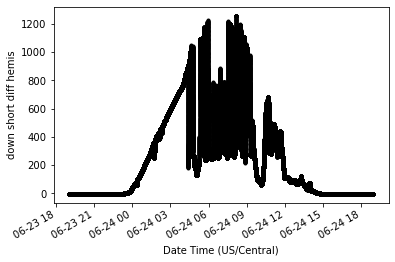

In [14]:
test = data_resampled_filled.index.tz_convert('US/Central')

fig, ax = plt.subplots(1,1, sharex="col")
ax.plot(test, data_resampled_filled["Global Horizontal [W/m^2]"],'.k')
ax.set_ylabel('down short diff hemis')
ax.set_xlabel('Date Time (US/Central)')
fig.autofmt_xdate()
plt.tight_layout

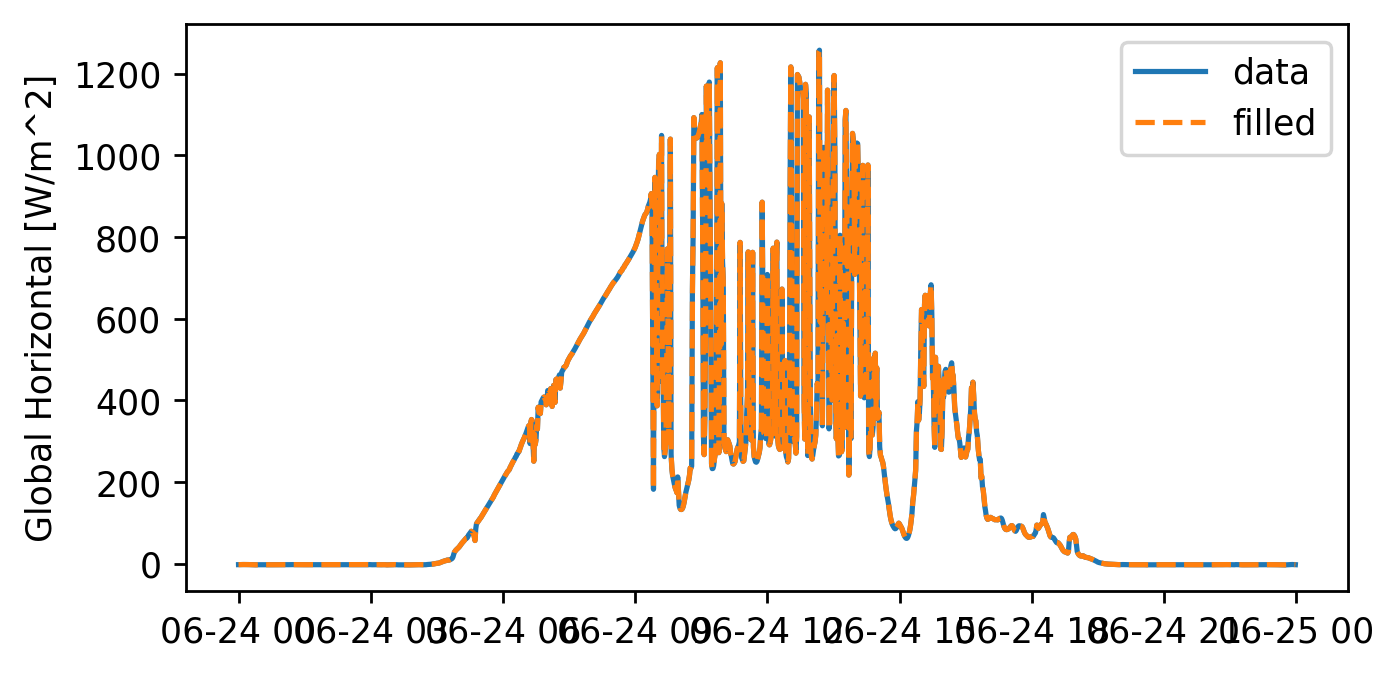

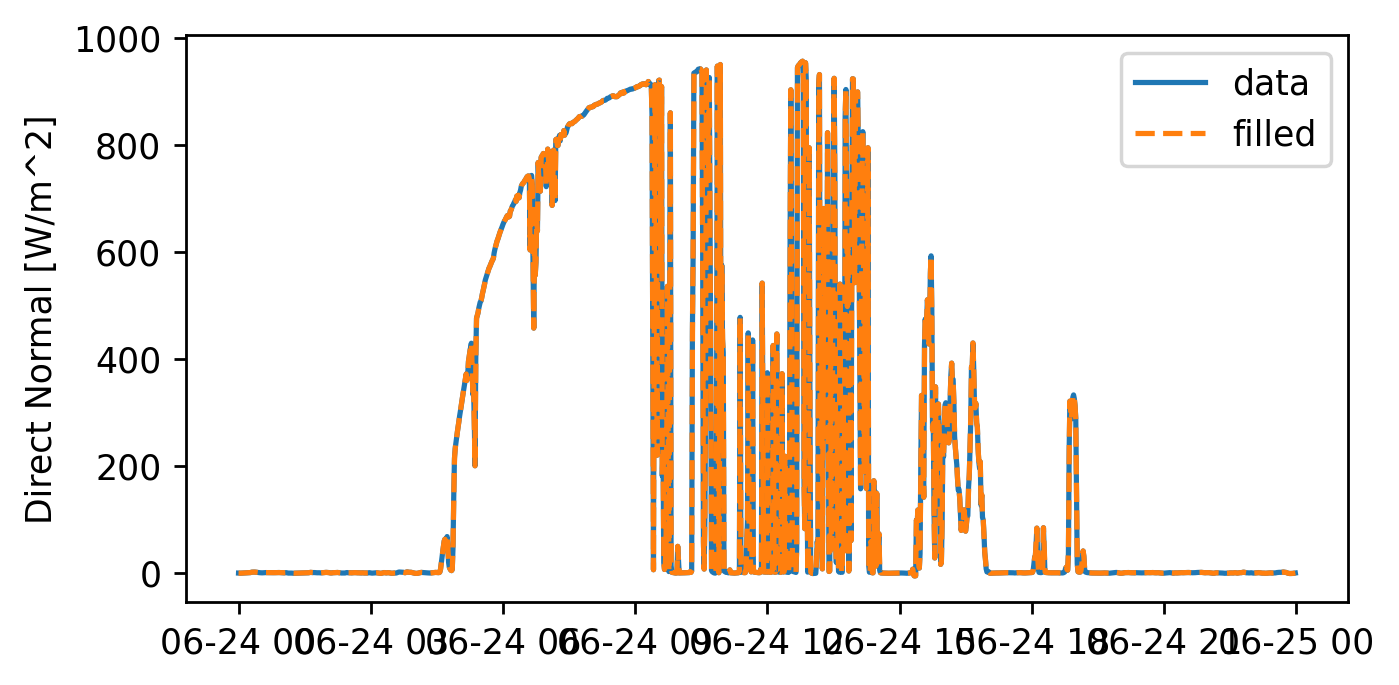

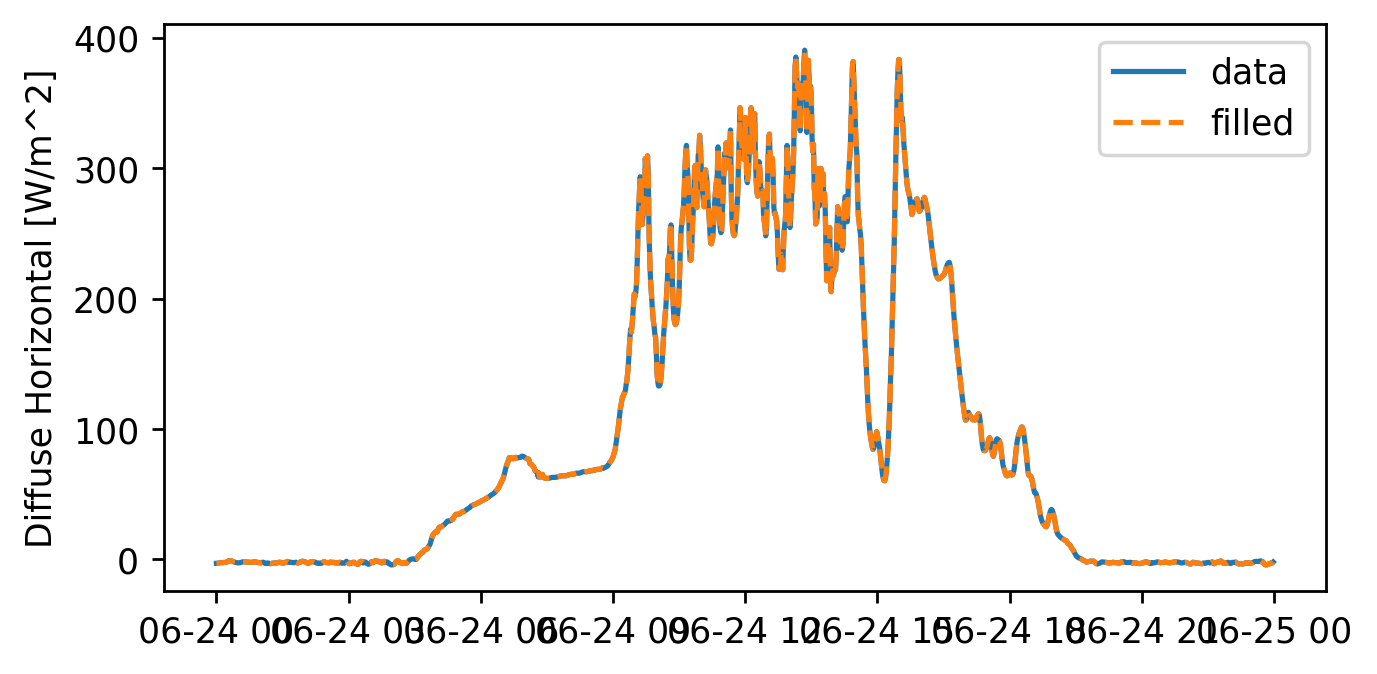

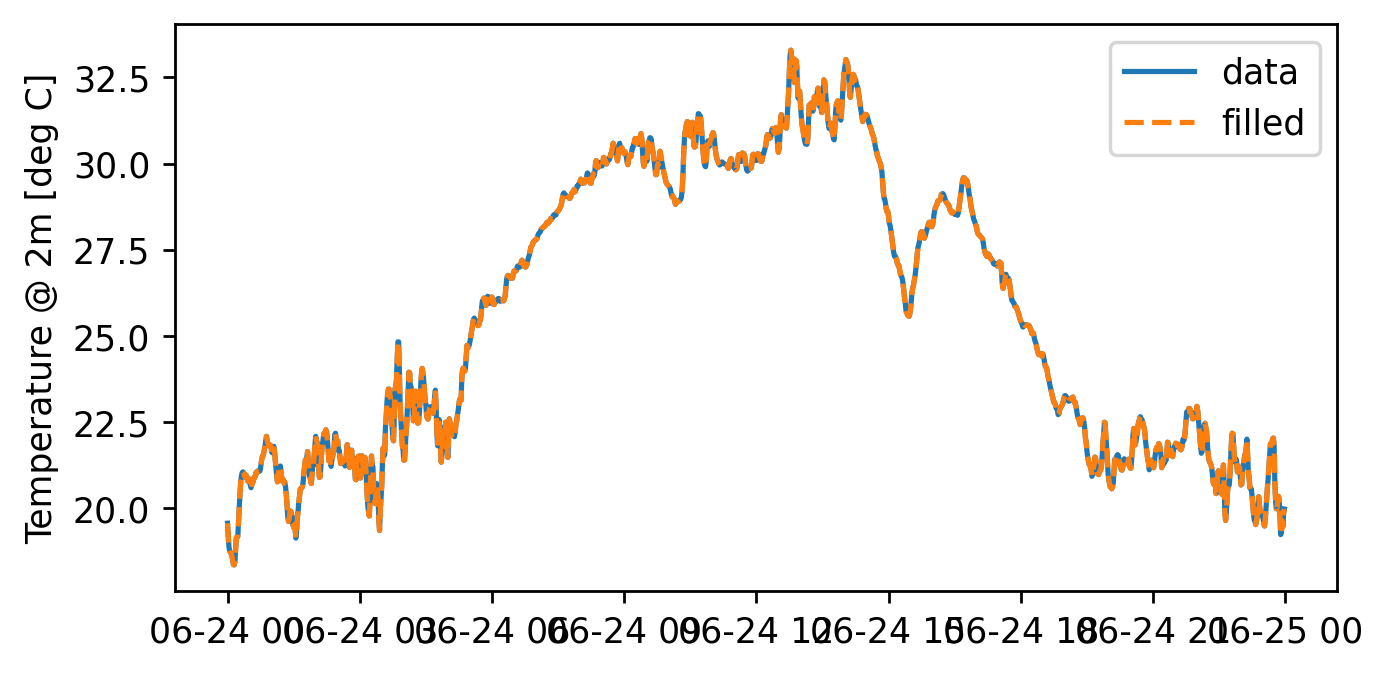

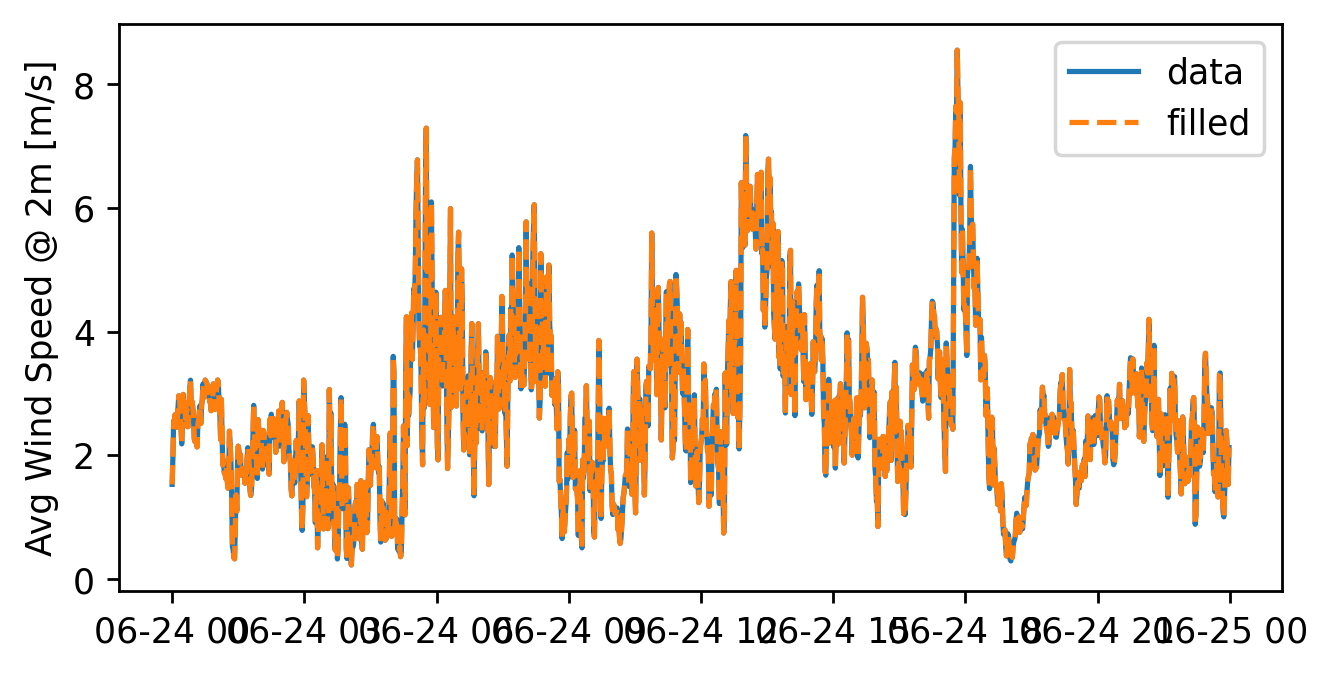

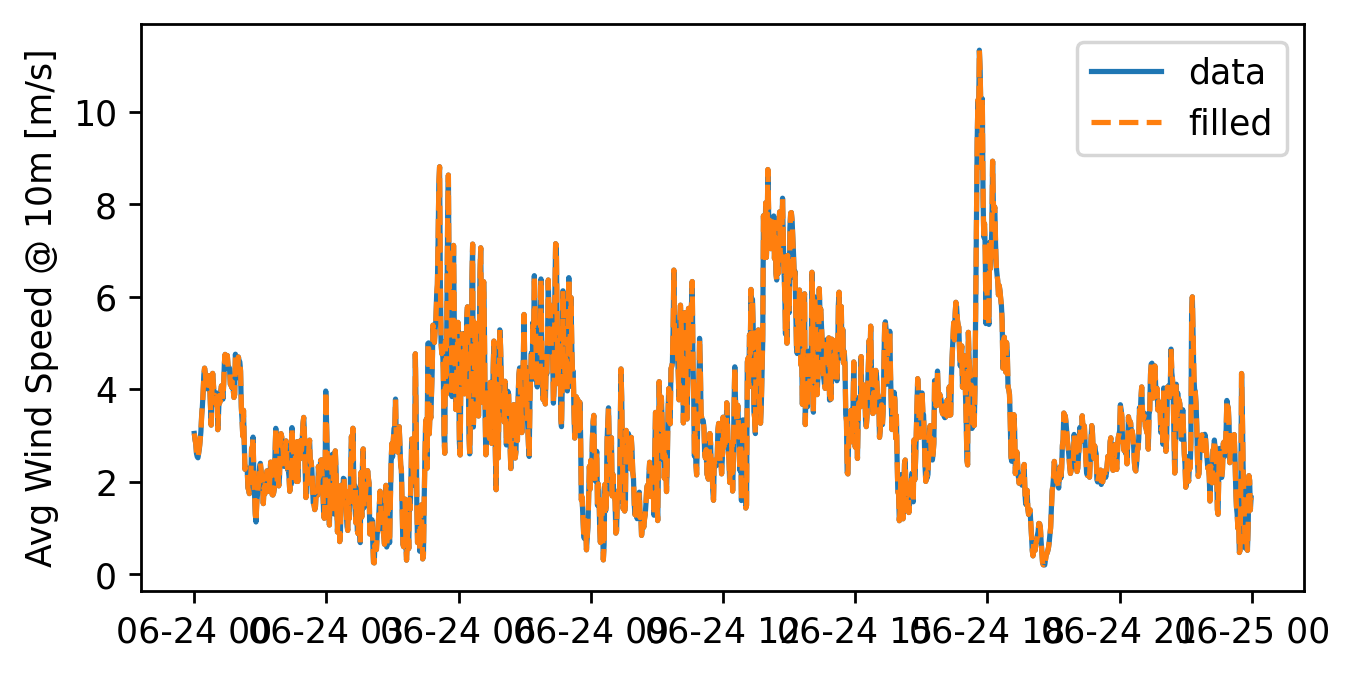

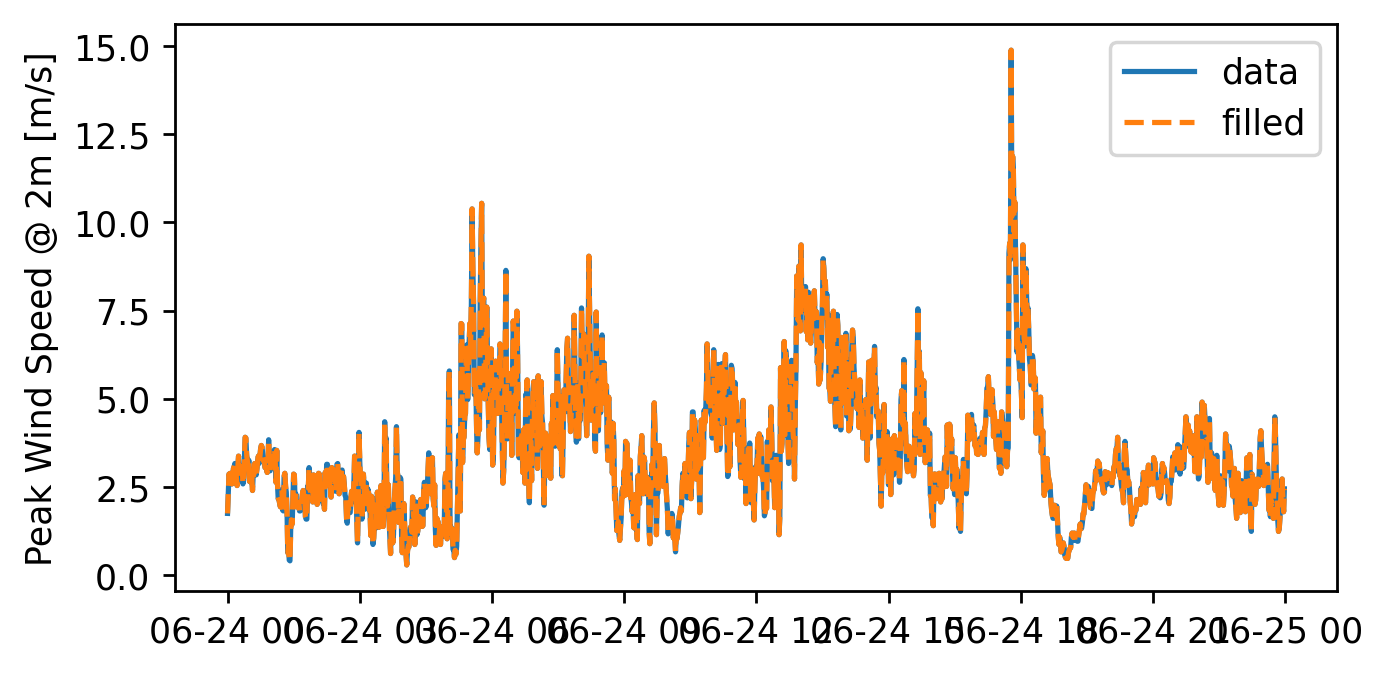

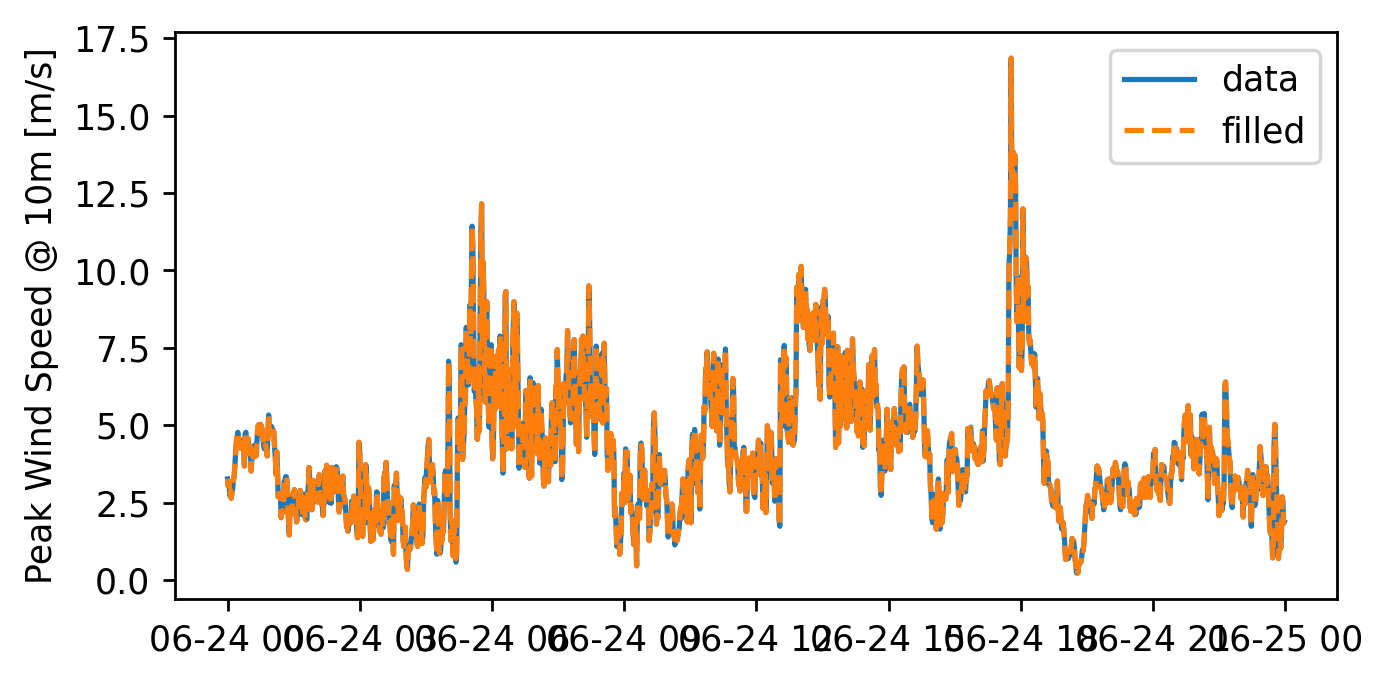

In [15]:
# data['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot()
# data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot(style='.-')
# plt.legend(["data", "resampled"])
# plt.ylabel("Energy (kW)")

for col in data.columns:
    fig, ax = plt.subplots(figsize=[6, 3], dpi=250)
    ax.plot(data[col], "-", label="data")
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(data_resampled_filled[col], "--", label="filled")
    ax.set_ylabel(col)
    ax.legend()

In [31]:
# convert solar data to input csv format - same as NonAnnualSimulation csv
sel_columns = ['short_direct_normal','down_short_diffuse_hemisp','down_short_hemisp',
               'Temp_Air','wind_speed']
sel_columns = ['Global Horizontal [W/m^2]','Direct Normal [W/m^2]', 
                'Diffuse Horizontal [W/m^2]','Temperature @ 2m [deg C]', 
                'Avg Wind Speed @ 2m [m/s]','Avg Wind Speed @ 10m [m/s]',
                'Peak Wind Speed @ 2m [m/s]','Peak Wind Speed @ 10m [m/s]']
# sel_columns = ['aqc_short_direct_normal','aqc_down_short_diffuse_hemisp','aqc_down_short_hemisp',
#                'Temp_Air','wind_speed']

exportdf = data_resampled_filled[sel_columns].copy()

# # filter for time period
tstart = '2024-06-24 5:00:00'
tend = '2024-06-24 22:00:00'
exportdf = exportdf[(exportdf.index >= tstart) & (exportdf.index <= tend)]

exportdf.index.names = ['Timestamp']

# replace negative DNI with zeros
exportdf['Global Horizontal [W/m^2]'][exportdf['Global Horizontal [W/m^2]'] < 0] = 0
exportdf['Direct Normal [W/m^2]'][exportdf['Direct Normal [W/m^2]'] < 0] = 0
exportdf['Diffuse Horizontal [W/m^2]'][exportdf['Diffuse Horizontal [W/m^2]'] < 0] = 0

# replace NaNs with interpolated values
exportdf = exportdf.interpolate('linear')

# exportdf = exportdf.rename(columns={"short_direct_normal": "SRRL BMS Direct Normal Irradiance", 
#                                     "down_short_hemisp" : "SRRL BMS Global Horizontal Irradiance",
#                                     "down_short_diffuse_hemisp": "SRRL BMS Diffuse Horizontal Irradiance",
#                                     "Temp_Air": "SRRL BMS Dry Bulb Temperature",
#                                     "wind_speed": "SRRL BMS Wind Speed at 10 m (m/s)"})
exportdf = exportdf.rename(columns={"Direct Normal [W/m^2]": "SRRL BMS Direct Normal Irradiance (W/m²_irr)", 
                                    "Global Horizontal [W/m^2]" : "SRRL BMS Global Horizontal Irradiance (W/m²_irr)",
                                    "Diffuse Horizontal [W/m^2]": "SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)",
                                    "Temperature @ 2m [deg C]": "SRRL BMS Dry Bulb Temperature (°C)",
                                    "Avg Wind Speed @ 2m [m/s]": "SRRL BMS Wind Speed at 19' (m/s)"}) # !!! THIS NEEDS TO BE INTERPOLATED TO 19' FROM 10m
# exportdf = exportdf.rename(columns={"aqc_short_direct_normal": "SRRL BMS Direct Normal Irradiance (W/m²_irr)", 
#                                     "aqc_down_short_hemisp" : "SRRL BMS Global Horizontal Irradiance (W/m²_irr)",
#                                     "aqc_down_short_diffuse_hemisp": "SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)",
#                                     "Temp_Air": "SRRL BMS Dry Bulb Temperature (°C)",
#                                     "wind_speed": "SRRL BMS Wind Speed at 19' (m/s)"}) # !!! THIS NEEDS TO BE INTERPOLATED TO 19' FROM 10m

# exportdf.to_csv('Flatirons_solar_data_precursor-tztest.csv')

exportdf

,SRRL BMS Global Horizontal Irradiance (W/m²_irr),SRRL BMS Direct Normal Irradiance (W/m²_irr),SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr),SRRL BMS Dry Bulb Temperature (°C),SRRL BMS Wind Speed at 19' (m/s),Avg Wind Speed @ 10m [m/s],Peak Wind Speed @ 2m [m/s],Peak Wind Speed @ 10m [m/s]
Timestamp,,,,,,,,
2024-06-24 12:31:00+00:00,916.201000,615.93400,304.045000,30.430000,0.745000,1.432000,1.148000,1.940000
2024-06-24 12:31:00.500000+00:00,918.704992,618.32895,304.199917,30.432583,0.747375,1.432500,1.152058,1.938258
2024-06-24 12:31:01+00:00,921.208983,620.72390,304.354833,30.435167,0.749750,1.433000,1.156117,1.936517
2024-06-24 12:31:01.500000+00:00,923.712975,623.11885,304.509750,30.437750,0.752125,1.433500,1.160175,1.934775
2024-06-24 12:31:02+00:00,926.216967,625.51380,304.664667,30.440333,0.754500,1.434000,1.164233,1.933033
...,...,...,...,...,...,...,...,...
2024-06-24 21:59:58+00:00,0.000000,0.00000,0.000000,22.953000,3.380533,3.986467,4.441033,4.518867
2024-06-24 21:59:58.500000+00:00,0.000000,0.00000,0.000000,22.954750,3.388400,3.996600,4.453025,4.523900
2024-06-24 21:59:59+00:00,0.000000,0.00000,0.000000,22.956500,3.396267,4.006733,4.465017,4.528933


### Set model parameters

In [ ]:
sys_design = {
    "ModelParams": {
        "SystemDesign": {
            "array_type": 2.0,
            "azimuth": 180.0,
            "dc_ac_ratio": 1.08,
            "gcr": 0.592,
            "inv_eff": 97.5,
            "losses": 15.53,
            "module_type": 2.0,
            "system_capacity": 720,
            "tilt": 0.0,
        },
        "SolarResource": {},
    },
    "Other": {"lat": 39.7442, "lon": -105.1778, "elev": 1829},
}

model_params = sys_design["ModelParams"]
elev = sys_design["Other"]["elev"]
lat = sys_design["Other"]["lat"]
lon = sys_design["Other"]["lon"]
tz = data.index[0].utcoffset().total_seconds() / 60 / 60

### Make predictions

In [ ]:
system_model = pvwatts.new()
system_model.assign(model_params)

solar_resource_data = {
    "tz": tz,  # timezone
    "elev": elev,  # elevation
    "lat": lat,  # latitude
    "lon": lon,  # longitude
    "year": tuple(weather_data[0]),  # year
    "month": tuple(weather_data[1]),  # month
    "day": tuple(weather_data[2]),  # day
    "hour": tuple(weather_data[3]),  # hour
    "minute": tuple(weather_data[4]),  # minute
    "dn": tuple(weather_data[5]),  # direct normal irradiance
    "df": tuple(weather_data[6]),  # diffuse irradiance
    "gh": tuple(weather_data[7]),  # global horizontal irradiance
    "wspd": tuple(weather_data[8]),  # windspeed
    "tdry": tuple(weather_data[9]),  # dry bulb temperature
}

system_model.SolarResource.assign({"solar_resource_data": solar_resource_data})
system_model.AdjustmentFactors.assign({"constant": 0})

system_model.execute()
out = system_model.Outputs.export()

ac = np.array(out["ac"]) / 1000
dc = np.array(out["dc"]) / 1000

predictions = pd.DataFrame(
    {"ac": ac, "dc": dc, "aoi": np.array(out["aoi"])}, columns=["ac", "dc", "aoi"]
)
predictions = predictions.set_index(data.index.copy())

In [ ]:
fig, ax = plt.subplots()
ax.plot(predictions["ac"], "-", label="Predicted energy")
ax.plot(data["Energy (kW)"], "-", label="Actual energy")
ax.legend()
plt.ylabel("Energy (kW)")

In [ ]:
fig, ax = plt.subplots()
ax.plot(predictions["aoi"])
plt.ylabel("Angle of Incidence")

Looks good so let's save the interpolated data as a csv

In [ ]:
data.to_csv("NonAnnualSimulation-sample_data-interpolated.csv")
data_resampled_filled.to_csv("NonAnnualSimulation-sample_data-interpolated-daytime.csv")

In [ ]:
test_data_interp = pd.read_csv("NonAnnualSimulation-sample_data-interpolated.csv")
test_data_interp["Timestamp"] = pd.DatetimeIndex(
    pd.to_datetime(test_data_interp["Timestamp"], format="ISO8601", utc=True)
)
test_data_interp = test_data_interp.set_index("Timestamp")
test_data_interp.head()

In [ ]:
test_data_interp.info()

In [ ]:
data.info()

In [ ]:
data.index[-1] - data.index[0]

In [ ]:
# plot original data vs interpolated data read in from csv
for col in data.columns:
    fig, ax = plt.subplots(figsize=[6, 3], dpi=250)
    ax.plot(data[col], "-", label="original")
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(test_data_interp[col], "--", label="interp")
    ax.set_ylabel(col)
    ax.legend()